In [1]:
import os
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load data
#os.chdir('/home/najada/Documents/MADS/Semester 3/Statec/') # set working directory to your file's location
df = pd.read_csv('/home/najada/Documents/MADS/Semester 3/Statec/Vasja_hw/CAPG2211A2S.csv', on_bad_lines='skip')

###  Prediction of Time Series  "Industrial Capacity: Utilities: Electric and Gas Utilities (NAICS = 2211,2)"

The time series analyzed is taken from this link: https://fred.stlouisfed.org/series/CAPG2211A2S. It is a time series taken by Federal Reserve Economic Data or FRED which is an online database consisting of hundreds of thousands of economic data time series from scores of national, international, public, and private sources. FRED is created and maintained by the Research Department at the Federal Reserve Bank of St. Louis. 

The time series is seasonally-adjusted and it shows monthly frequent data from 1967-01-01 to 2022-11-01. 

The dataframe consists of the date and the value as shown below when displayed:

In [2]:
df

,DATE,CAPG2211A2S
0,1967-01-01,33.8397
1,1967-02-01,34.0559
2,1967-03-01,34.2721
3,1967-04-01,34.4883
4,1967-05-01,34.7046
...,...,...
666,2022-07-01,142.0103
667,2022-08-01,142.3082
668,2022-09-01,142.6033
669,2022-10-01,142.8972


Below, I display plotted data in the first part.

The second plot is the autocorrelation and the third is the partial correlation which we will analyze later on as well.

/home/najada/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


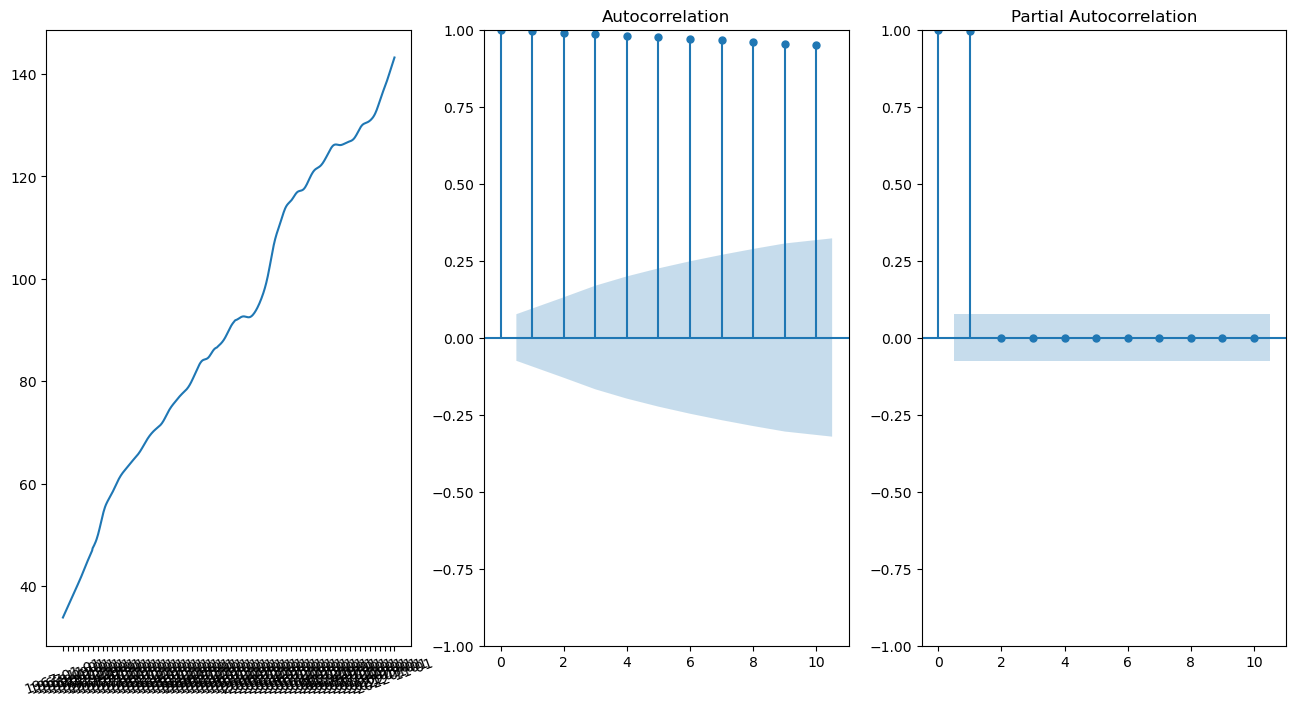

In [3]:
# Load data
df.columns = ['date', 'value']
#df['date'] = df['date'].dt.date     # this removes hour:min:sec time-stamp

# plots 
fig, axs = plt.subplots(1, 3,figsize=(16,8))
axs[0].plot(df.value)
axs[0].set_xticks(np.arange(0,len(df.value),10))                                                       # display every 10-th tick
axs[0].set_xticklabels(df.date[np.arange(0,len(df.value),10)],rotation=20);                            # label ticks
sm.graphics.tsa.plot_acf(df.value, lags=10, ax=axs[1]);
sm.graphics.tsa.plot_pacf(df.value, lags=10, ax=axs[2]);

First of all I wanted to emphasize that we are interested in working with stationary data. What does it mean for the time series to be stationary and why do we need it to be this way?


A time series is considered stationary if its statistical properties, such as the mean and variance, do not change over time. In other words, a stationary time series has a constant mean and constant variance over time.

There are a few reasons why it is important for a time series to be stationary:

**Simplifies modeling and forecasting:** Stationary time series are easier to model and forecast because their statistical properties do not change over time. This means that the relationships between the variables in the time series can be assumed to be constant, which simplifies the modeling process.

**Allows for the use of certain statistical methods:** Many statistical methods, such as the autoregression (AR) and moving average (MA) models, assume that the time series is stationary. These methods will not work on non-stationary time series.

Most time series models presume that each point is independent of the others for forecasting or predicting the future which means the mean, variance, and covariance do not change over time. When the dataset of previous cases is steady, this is the best indicator. 


From looking at the results of the previous plot, I can sense that the data is not stationary because it seems to have an increasing trend, but I wanted to make sure by testing using The Augumented Dickey-Fuller Test. 

**The null hypothesis of this test is: The time series has a unit root and therefore it is not stationary.**

We are interested in having a stationary time series and therefore rejecting the null hypothesis. 

For this purpose we should check the p-value which should be less than the chosen significance level which for me it will be alpha= 0.05.


In [4]:
# PART 2: ADF test
# What is null hypothesis in ADF-test? 
print("Results of Dickey-Fuller Test:")
res = sm.tsa.stattools.adfuller(df["value"],maxlag=5,regression='c',autolag='AIC')
print(f"Test Statistic:{res[0]}")
print(f"p-value:{res[1]}")
print(f"#Lags Used:{res[2]}")
print(f"#Observations Used:{res[3]}")

Results of Dickey-Fuller Test:
Test Statistic:-0.6099026207697685
p-value:0.868728703790302
#Lags Used:5
#Observations Used:665


P-value in this case is around 0.8 and therefore much bigger than the level of significance.

There are different ways on how we can make the time series stationary, for example: Differencing, Smoothing, Decomposition, Log and BoxCox transformations. There are many other ways as well. 

I use the differencing and then plot the time series and test for stationarity one more time.

/home/najada/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


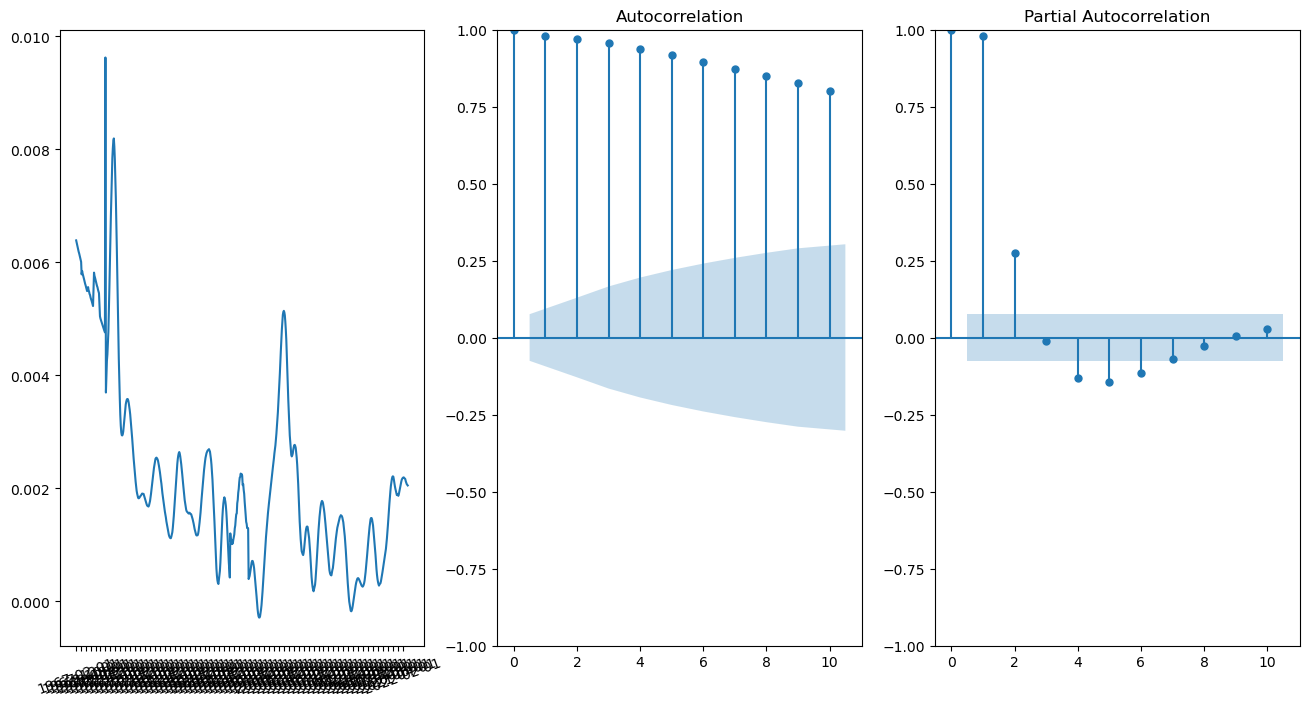

In [5]:
# PART 1: Plot first differences of the series and AC& PAC
df['dy'] = df['value'].pct_change()

# plots 
fig, axs = plt.subplots(1, 3,figsize=(16,8))
axs[0].plot(df['dy'].dropna())
axs[0].set_xticks(np.arange(0,len(df['dy'].dropna()),10))                                                       # display every 10-th tick
axs[0].set_xticklabels(df.date[np.arange(1,len(df['dy'].dropna())+1,10)],rotation=20);                            # label ticks
sm.graphics.tsa.plot_acf(df['dy'].dropna(), lags=10, ax=axs[1]);
sm.graphics.tsa.plot_pacf(df['dy'].dropna(), lags=10, ax=axs[2]);

When differencing, each value substitutes the value in the row above, since we do not have a row above for the first row, the first value will be Nan. We cannot work with Nan values therefore we drop the first row.

In [7]:
df=df.dropna()

In [8]:
#ADF test
print("Results of Dickey-Fuller Test:")
res = sm.tsa.stattools.adfuller(df["dy"],maxlag=5,regression='c',autolag='AIC')
print(f"Test Statistic:{res[0]}")
print(f"p-value:{res[1]}")
print(f"#Lags Used:{res[2]}")
print(f"#Observations Used:{res[3]}")


Results of Dickey-Fuller Test:
Test Statistic:-3.314941711402395
p-value:0.014223648285870423
#Lags Used:5
#Observations Used:664


The p-value is less than 0.05 now, therefore we reject the null hypothesis and confirm that our data is stationary now.

/home/najada/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


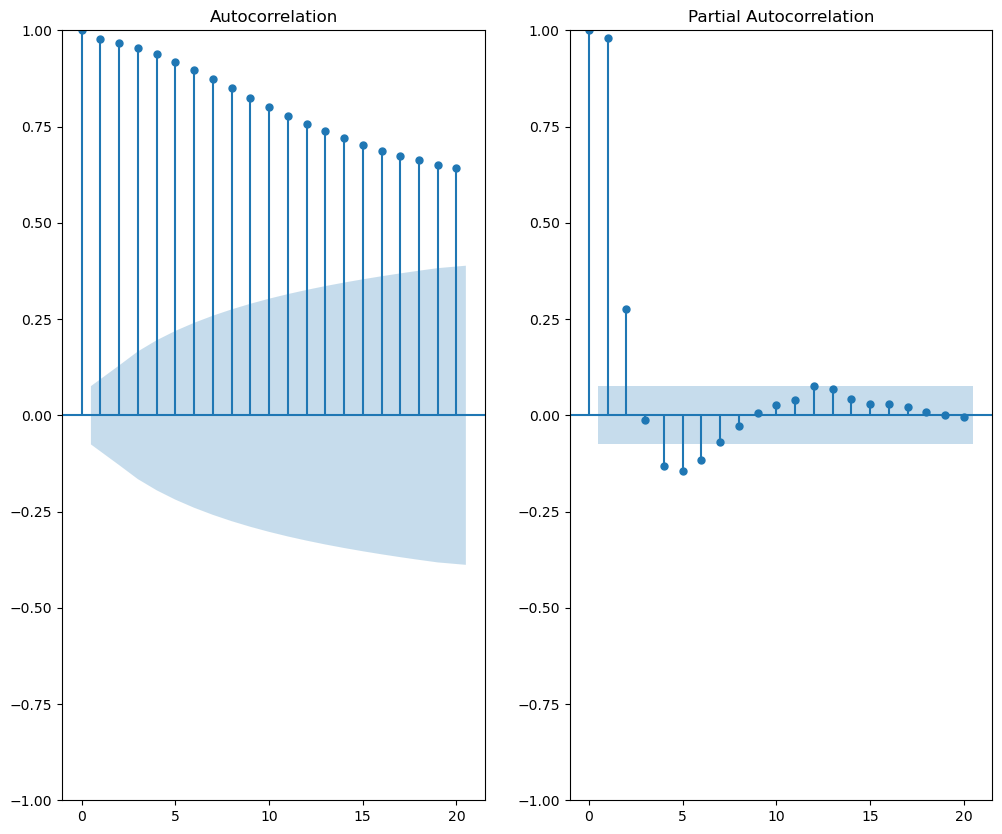

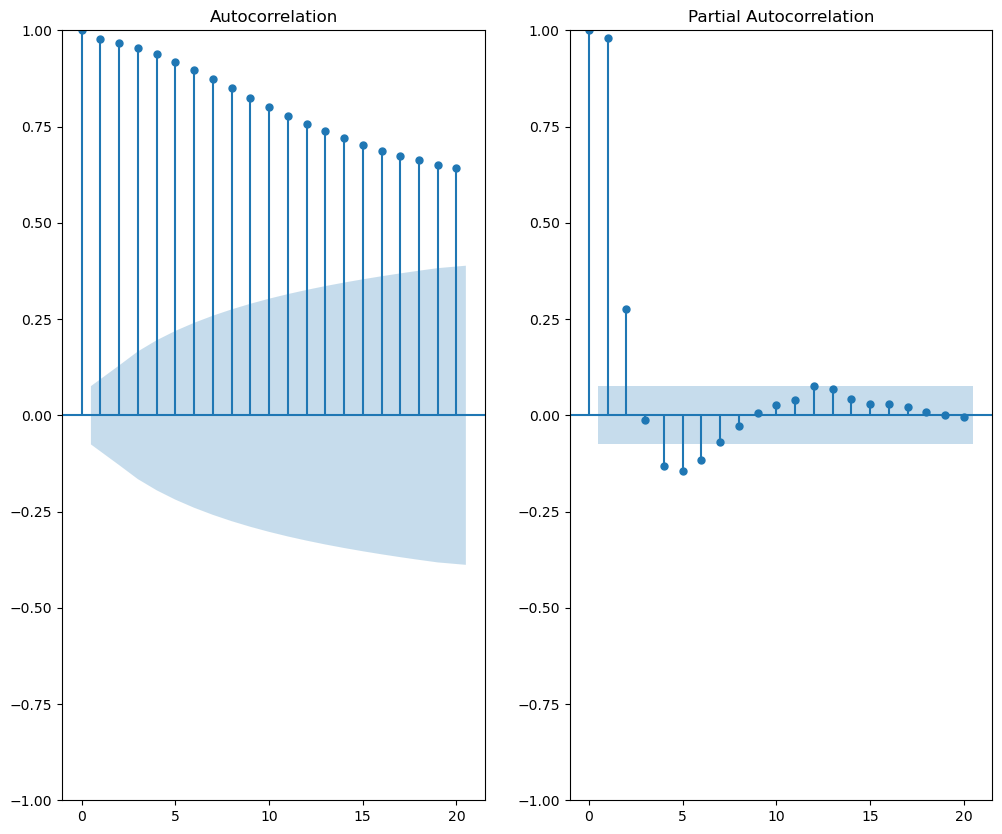

In [9]:
#Inspect AC and PAC function and select the number of AR and MA lags. 
fig, axs = plt.subplots(1, 2,figsize=(12,10))
sm.graphics.tsa.plot_acf(df['dy'], lags=20, ax=axs[0])
sm.graphics.tsa.plot_pacf(df['dy'], lags=20, ax=axs[1])


ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are used in time series analysis to help identify the order of an autoregressive (AR) or moving average (MA) model.

An autoregressive model is a time series model in which the current value of the time series is a function of its past values, and a moving average model is a time series model in which the current value of the time series is a function of past residuals or errors.

**ACF plot:** The ACF plot shows the correlation of a time series with its lagged values. It can help identify the order of an autoregressive (AR) model. If the ACF plot shows significant correlation at lag k, it suggests that the time series may be modeled using an AR(k) model. If the ACF plot decays exponentially, it suggests that the time series is likely a white noise process.

**PACF plot:** The PACF plot shows the correlation of a time series with its lagged values, with the effect of the intermediate lagged values removed. It can help identify the order of a moving average (MA) model. If the PACF plot shows significant correlation at lag k, it suggests that the time series may be modeled using an MA(k) model. If the PACF plot cuts off abruptly after lag k, it suggests that the time series is likely an AR(k) process.

Together, the ACF and PACF plots can be used to identify the order of both the autoregressive (AR) and moving average (MA) components of a time series model. For example, in our plot the ACF shows significant correlation at lags 1, 2, 3, and 4 I would say while the PACF plot shows significant correlation at lags 1 and 2, it suggests that the time series may be modeled using an ARIMA(2, 0, 4) model (AR(2) + MA(4) ).

It is worth noting that, while ACF and PACF plots can provide some insight into the order of an AR or MA model, they are not the only tool available for model selection. Other methods, such as the Akaike information criterion (AIC) and Bayesian information criterion (BIC), can also be used to select the appropriate model order.

### ARIMA model

Now I do some preeleminary steps on splitting the dataset and preparing it for model fitting. 

In [10]:
df['date'] = pd.to_datetime(df['date'])

/tmp/ipykernel_290467/3532345252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [11]:
df = df.drop(columns=['value'])  #I use the differencing one from now on and therefore I drop value columns

In [12]:
df

,date,dy
1,1967-02-01,0.006389
2,1967-03-01,0.006348
3,1967-04-01,0.006308
4,1967-05-01,0.006272
5,1967-06-01,0.006233
...,...,...
666,2022-07-01,0.002125
667,2022-08-01,0.002098
668,2022-09-01,0.002074
669,2022-10-01,0.002061


In [13]:
#Save the first 80% of the sample for estimation
from sklearn.model_selection import train_test_split

# Reserve 80% of the sample for estimation
train_data, test_data = train_test_split(df, train_size=0.8, shuffle=False, random_state=42)

In [14]:
train_data.index= train_data['date']
train_data.drop('date', axis=1, inplace= True)

In [15]:
test_data.index= test_data['date']
test_data.drop('date', axis=1, inplace= True)

In [16]:
train_data

,dy
date,
1967-02-01,0.006389
1967-03-01,0.006348
1967-04-01,0.006308
1967-05-01,0.006272
1967-06-01,0.006233
...,...
2011-05-01,0.001459
2011-06-01,0.001490
2011-07-01,0.001504


In [17]:
train_data.shape

(536, 1)

In [18]:
test_data.shape

(134, 1)

Now I will use AIC (Akaike Information Criterion), BIC (Bayesian Information Criterion) and HQIC (Hannan-Quinn Information Criterion), that are model selection criteria used to compare different models and select the one that best fits the data.

**AIC:** AIC is a model selection criterion that balances the goodness of fit of a model with its complexity. It is defined as:
AIC = 2k - 2ln(L), where k is the number of parameters in the model and L is the likelihood of the data given the model. AIC penalizes models with more parameters, thus it prefers a simpler model with a slightly lower goodness of fit over a more complex model with a higher goodness of fit.

**BIC: BIC** is another model selection criterion that balances the goodness of fit of a model with its complexity. It is defined as:
BIC = kln(n) - 2ln(L), where k is the number of parameters in the model, n is the sample size, and L is the likelihood of the data given the model. BIC penalizes models with more parameters even more than AIC does, thus it prefers a simpler model with a slightly lower goodness of fit over a more complex model with a higher goodness of fit.

**HQIC:** HQIC is similar to AIC and BIC, it is also a model selection criterion that balances the goodness of fit of a model with its complexity. It is defined as:
HQIC = kln(ln(n)) - 2ln(L), where k is the number of parameters in the model, n is the sample size, and L is the likelihood of the data given the model. HQIC tends to be more conservative than AIC and BIC, it prefers a simpler model with a slightly lower goodness of fit over a more complex model with a higher goodness of fit.

In [19]:
# Decide on the appropriate ARIMA(p,d,q) model
# estimate ICs
IC = sm.tsa.stattools.arma_order_select_ic(train_data, max_ar=4, max_ma=4, ic=['aic','bic','hqic'], trend='c')
# display optimal lags
print(f"min AIC at (p,q): {IC.aic_min_order}")
print(f"min BIC at (p,q): {IC.bic_min_order}")
print(f"min HQIC at (p,q): {IC.hqic_min_order}")
print("ICs suggest either AR(0) or AR(1).")
print("Let us estimate AR(1) and inspect its properties.")

/home/najada/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/najada/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/najada/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/najada/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/najada/anaconda3/lib/python3.9/site-packages/statsmod

min AIC at (p,q): (2, 4)
min BIC at (p,q): (2, 3)
min HQIC at (p,q): (2, 4)
ICs suggest either AR(0) or AR(1).
Let us estimate AR(1) and inspect its properties.


AIC and HQIC both suggest that the best model is ARIMA(2,0,4) with the minimum value of AIC and HQIC. 
BIC, on the other hand, suggests that the best model is ARIMA(2,0,3) with the minimum value of BIC.


I will use auto_arima to properly choose the number of lags.

In [20]:
!pip install pmdarima

In [21]:
from pmdarima import auto_arima

# fit an ARIMA model using auto_arima
model = auto_arima(train_data,
                  seasonal=False, trace=True, information_criterion='aic')


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-7055.564, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6970.807, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7035.702, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7022.169, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6972.458, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-7064.947, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-7040.253, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7033.922, Time=0.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-7076.894, Time=0.37 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-7057.683, Time=0.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-7074.744, Time=0.97 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-7074.605, Time=1.08 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-7063.604, Time=0.64 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-7073.856, Time=0.92 sec
 ARIMA(1,1,3)(0,0,0

Auto_arima suggests using model ARIMA(1,0,3), because I applied differencing once and I do not think it is necessary again.

In [22]:
mod = sm.tsa.arima.ARIMA(train_data, order=(1, 0, 3), trend='t', validate_specification=True)
res = mod.fit()
print(res.summary())

/home/najada/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/najada/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/najada/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                     dy   No. Observations:                  536
Model:                 ARIMA(1, 0, 3)   Log Likelihood                3535.459
Date:                Thu, 26 Jan 2023   AIC                          -7058.919
Time:                        00:06:01   BIC                          -7033.214
Sample:                    02-01-1967   HQIC                         -7048.862
                         - 09-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.405e-06   5.96e-06      0.572      0.568   -8.27e-06    1.51e-05
ar.L1          0.9882      0.002    428.781      0.000       0.984       0.993
ma.L1         -0.4060      0.009    -43.262      0.0

/home/najada/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


When checking the p-values for different componenents we can see that it is 0 beside for the constant parameter. I am interested in ar.L1, ma.L1 , ma.L2 and ma.L3 and sigma2 and judged from the p-values all of them seems to be significant.

Now I want to visualize the residuals which can give us some insights about the chosen model. 

The plot helps to evaluate the quality of the model by analyzing the residuals, and check if they are random and have a mean of zero and are normally distributed. In my case, the mean of the residuals is about 0, the first plot shows some pattern but I am not sure if it is significant or no. The second plot should have the shape of a normal distribution. In my case I think it has the gist of it but not quite.

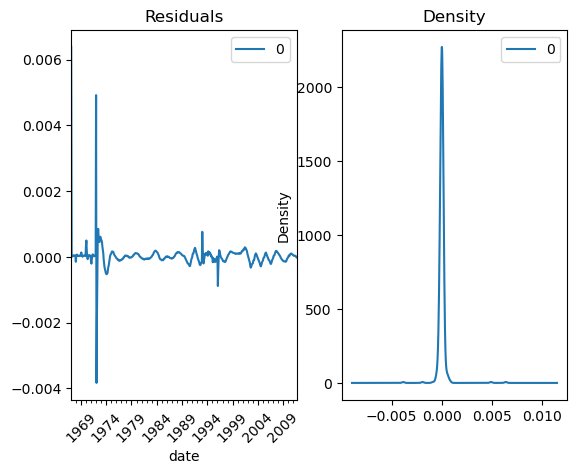

In [23]:
residuals = pd.DataFrame(res.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0], rot=45)
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Now I will try to do one-step-ahead forecasting. 

For this purpose I tried many many ways on how to approach to this task.

The code I was trying to implement was similiar to the one commented below:

I could not implement it because I had a lot of errors, even though I tried to debug, I had difficulties to arrive at the solution. For this reason I was obligated to try a lot of other predictions method and noone of them had good results.

Please follow through for more explanations.

In [ ]:
'''
# make predictions for the test set
predictions = []
for i in range(len(test_data)):
    forecast = res.forecast(steps=1)[0]
    predictions.append(forecast)
    # refit the model with updated data
    res = mod.fit(np.append(train_data,test_data[i]))

print(predictions)
'''

In [57]:
pred = res.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)

This code is performing one-step-ahead forecasting using an ARIMA model that has been trained on the train_data. The model.predict() function is used to generate predictions for the test_data.

The start and end parameters of the predict() function specify the range of observations for which the model should generate predictions. In this case, the code is specifying that the model should generate predictions for the entire test_data set.

The start parameter is set to the length of the train_data, which means that the model will start generating predictions for the first observation in the test_data set. The end parameter is set to the sum of the length of the train_data and the length of the test_data minus one, which means that the model will generate predictions for all observations in the test_data set.

In other words, the code is using the model that is trained on the train data, and using the model to predict the values of the test data. The predictions generated by the model are stored in the pred variable.

From what I found on the internet, this is considered as one step ahead forecasting because, the model is predicting the next value of the time series only based on the previous data, but there were conflicting arguments wether it is one-step-ahead forecasting or no.

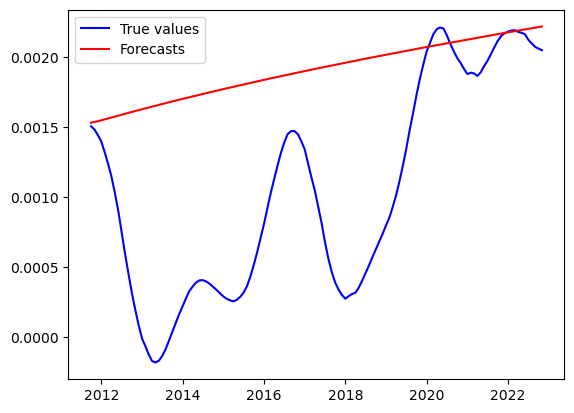

In [63]:
# Plot the forecasts and true values
plt.plot(test_data, label='True values', color='blue')
plt.plot(pred, label='Forecasts', color='red')
plt.legend()
plt.show()

In [66]:
# Calculate the RMSE of the forecasts
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_data, pred))
print("RMSE of the forecasts:", rmse)

RMSE of the forecasts: 0.001065614127087842


As we can see from the results, the predictions are far from perfect. Here we notice a contraversial result as well. The plot shows that the predicted values are far from the real ones but the rmse is quite small. This might mean that the difference between the values are small in average, but there are a lot of variations. 

Being of a contraversial nature, I decided to investigate this further. 

One common reason why this happens might be overfitting. In order to see if this was really the case, I used .predict() to predict the values in-sample(meaning the ones from the train data itselft). Then I plotted these values and the train values in the same plot and *Voilà*, it shows that the reason is indeed overfitting. 

In [67]:
pred_train=res.predict() 

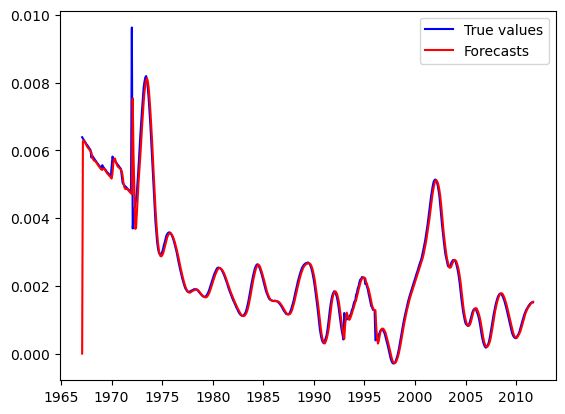

In [68]:
plt.plot(train_data, label='True values', color='blue')
plt.plot(pred_train, label='Forecasts', color='red')
plt.legend()
plt.show()

But what I could have possible done wrong why building the model. I am not really aware of this as I tried to apply different tests and study carefully on how I can choose the order and check the results of the fitting.

It is worthy to be mentioned that plotting the residuals kind of suggested that the model might need improving, but I did not know exactly how to do this. 

### Multivariate Time Series Analysis

To help predict my primary time series for this assignment which is the Industrial Capacity: Electric and Gas Utilities, I though it would suffice to choose "Industrial Production: Total Index (INDPRO)" from the same data source (FRED), which can be found in this link: https://fred.stlouisfed.org/series/INDPRO. Its values are also registered per month and it is seasonally adjusted.

In order to start working with it and use the VAR model , I made some changes like with the first time series. Please follow along below:

In [192]:
df1 = pd.read_csv('/home/najada/Documents/MADS/Semester 3/Statec/Vasja_hw/INDPRO.csv', on_bad_lines='skip')

In [193]:
df1

,DATE,INDPRO
0,1919-01-01,4.8773
1,1919-02-01,4.6617
2,1919-03-01,4.5270
3,1919-04-01,4.6078
4,1919-05-01,4.6348
...,...,...
1243,2022-08-01,104.4696
1244,2022-09-01,104.8292
1245,2022-10-01,104.7972
1246,2022-11-01,104.1863


In [194]:
df1.columns = ['date', 'value']

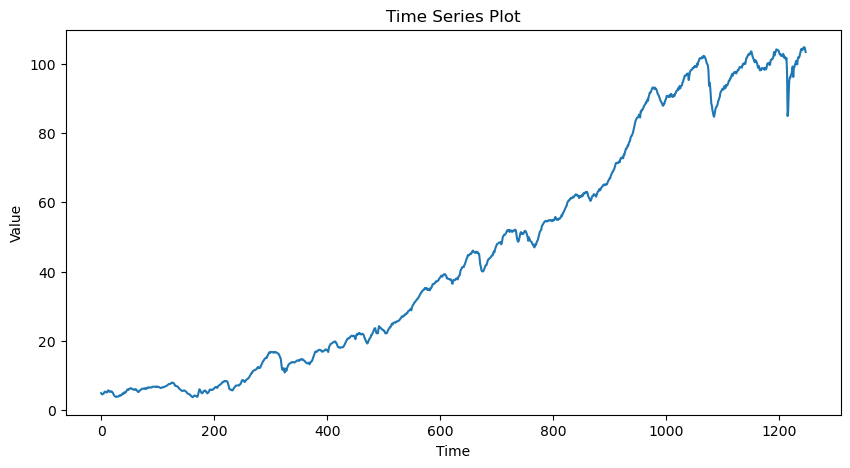

In [195]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df1['value'])
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Plot')
plt.show()


First, I plotted to have an idea of how the line looks, secondly I need to test for stationarity. 

In [198]:
#ADF test
# What is null hypothesis in ADF-test? 
print("Results of Dickey-Fuller Test:")
res = sm.tsa.stattools.adfuller(df1["value"],maxlag=5,regression='c',autolag='AIC')
print(f"Test Statistic:{res[0]}")
print(f"p-value:{res[1]}")
print(f"#Lags Used:{res[2]}")
print(f"#Observations Used:{res[3]}")
# print(f"#Critical value:{res[4]}")

Results of Dickey-Fuller Test:
Test Statistic:0.5023640848167994
p-value:0.9849447739123223
#Lags Used:4
#Observations Used:1243


P-value > 0.05 therefore the time series is not stationary. I difference again in order to make it stationary and continue the work.

In [199]:
df1['dy'] = df1['value'].pct_change()

In [200]:
df1

,date,value,dy
0,1919-01-01,4.8773,NaN
1,1919-02-01,4.6617,-0.044205
2,1919-03-01,4.5270,-0.028895
3,1919-04-01,4.6078,0.017848
4,1919-05-01,4.6348,0.005860
...,...,...,...
1243,2022-08-01,104.4696,-0.000123
1244,2022-09-01,104.8292,0.003442
1245,2022-10-01,104.7972,-0.000305
1246,2022-11-01,104.1863,-0.005829


I found it rational to remove some rows corresponding to the dates not evident in the main time series I want to predict. That one had 670 rows and this one has 1248 rows. The second is almost twice as big as the first one. For this reason I chose to remove the extra rows as I think they will not be very valuable for the prediction and also later on we will need to merge the dataframes and they cannot merge properly if they have different dimensions.

In [201]:

# Convert the 'date' column to datetime
df1['date'] = pd.to_datetime(df1['date'])

# Filter rows based on date range
df1 = df1[(df1['date'] >= '1967-02-01') & (df1['date'] <= '2022-11-01')] 


In [202]:
df1 = df1.dropna()

In [203]:
df1.index= df1['date']
df1.drop('date', axis=1, inplace= True)

In [204]:
df1.drop('value', axis=1, inplace= True)

In [207]:
#ADF test
print("Results of Dickey-Fuller Test:")
res = sm.tsa.stattools.adfuller(df1["dy"],maxlag=5,regression='c',autolag='AIC')
print(f"Test Statistic:{res[0]}")
print(f"p-value:{res[1]}")
print(f"#Lags Used:{res[2]}")
print(f"#Observations Used:{res[3]}")

Results of Dickey-Fuller Test:
Test Statistic:-10.705453935709485
p-value:3.4370229916866976e-19
#Lags Used:3
#Observations Used:666


The p-value is even bigger now, therefore I choose to differentiate again, even though I can use even other methods to change it to stationary.

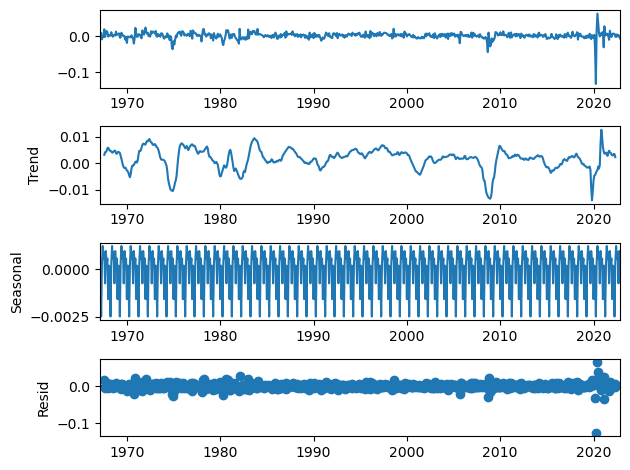

In [208]:
seasonal_decomp = seasonal_decompose(df1, model="additive")
seasonal_decomp.plot();

Check again the Augumented Dickey-Fuller test results.

In [209]:
df1['dy1'] = df1['dy'].pct_change()

In [210]:
df1

,dy,dy1
date,,
1967-02-01,-0.011342,NaN
1967-03-01,-0.005636,-0.503119
1967-04-01,0.009431,-2.673382
1967-05-01,-0.008725,-1.925180
1967-06-01,-0.000124,-0.985787
...,...,...
2022-07-01,0.005157,-3.461618
2022-08-01,-0.000123,-1.023758
2022-09-01,0.003442,-29.097192


In [211]:
df1= df1.dropna()

In [213]:
#ADF test
print("Results of Dickey-Fuller Test:")
res = sm.tsa.stattools.adfuller(df1["dy1"],maxlag=5,regression='c',autolag='AIC')
print(f"Test Statistic:{res[0]}")
print(f"p-value:{res[1]}")
print(f"#Lags Used:{res[2]}")
print(f"#Observations Used:{res[3]}")

Results of Dickey-Fuller Test:
Test Statistic:-25.777669659037777
p-value:0.0
#Lags Used:0
#Observations Used:668


The p-value now is 0 and it means that we can reject with 100% confidence, which seems a bit suspicous. To make sure of my results I decided to use KPSS test as well.

In [214]:
#KPSS test
# What is null hypothesis in KPSS-test? 
print("Results of KPSS Test:")
res = sm.tsa.stattools.kpss(df1["dy1"],regression='c',nlags='auto')
print(f"Test Statistic:{res[0]}")
print(f"p-value:{res[1]}")

Results of KPSS Test:
Test Statistic:0.2849100168807969
p-value:0.1


/home/najada/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Now the p-value is bigger than 0.05 which the level of significance I chose. In KPSS test, the null hypothesis is that the time series is in fact stationary. In my case, I do not reject this hypothesis and therefore the data is stationary.

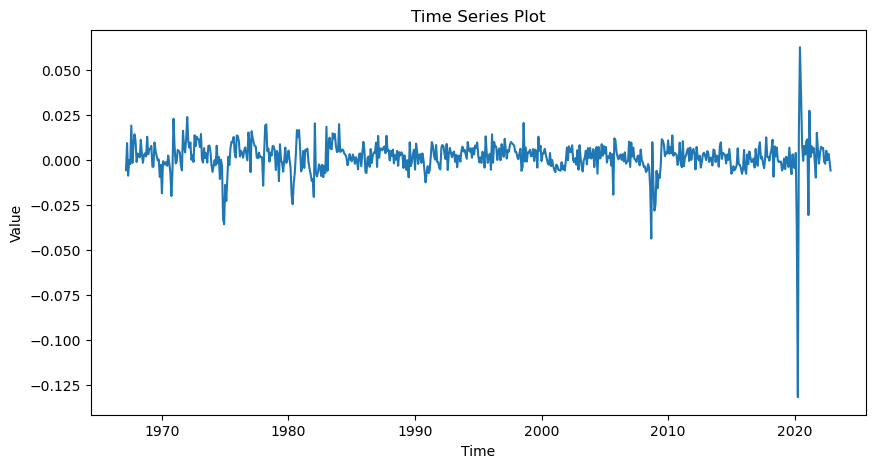

In [215]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df1['dy'])
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Plot')
plt.show()

In [224]:
df

,date,dy
1,1967-02-01,0.006389
2,1967-03-01,0.006348
3,1967-04-01,0.006308
4,1967-05-01,0.006272
5,1967-06-01,0.006233
...,...,...
666,2022-07-01,0.002125
667,2022-08-01,0.002098
668,2022-09-01,0.002074
669,2022-10-01,0.002061


In [226]:
df.index=df['date']
df.drop('date', axis=1, inplace= True)

In [230]:
#Estimate correlation between the differentiated values of the first df and the second one

correlation = df['dy'].corr(df1['dy1'])

In [228]:
correlation

-0.06222332380571204

The correlation value does not look quite right, but I keep going.

In [221]:
merged_df = pd.merge(df, df1, on='date')
merged_df

,date,dy_x,dy_y,dy1
0,1967-03-01,0.006348,-0.005636,-0.503119
1,1967-04-01,0.006308,0.009431,-2.673382
2,1967-05-01,0.006272,-0.008725,-1.925180
3,1967-06-01,0.006233,-0.000124,-0.985787
4,1967-07-01,0.006188,-0.002276,17.351113
...,...,...,...,...
664,2022-07-01,0.002125,0.005157,-3.461618
665,2022-08-01,0.002098,-0.000123,-1.023758
666,2022-09-01,0.002074,0.003442,-29.097192
667,2022-10-01,0.002061,-0.000305,-1.088683


In [222]:
# Perform the Granger causality test
from statsmodels.tsa.stattools import grangercausalitytests

result = grangercausalitytests(merged_df[['dy_x', 'dy_y']],6)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7187  , p=0.3969  , df_denom=665, df_num=1
ssr based chi2 test:   chi2=0.7220  , p=0.3955  , df=1
likelihood ratio test: chi2=0.7216  , p=0.3956  , df=1
parameter F test:         F=0.7187  , p=0.3969  , df_denom=665, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3386  , p=0.7129  , df_denom=662, df_num=2
ssr based chi2 test:   chi2=0.6822  , p=0.7110  , df=2
likelihood ratio test: chi2=0.6819  , p=0.7111  , df=2
parameter F test:         F=0.3386  , p=0.7129  , df_denom=662, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3733  , p=0.7723  , df_denom=659, df_num=3
ssr based chi2 test:   chi2=1.1318  , p=0.7694  , df=3
likelihood ratio test: chi2=1.1309  , p=0.7696  , df=3
parameter F test:         F=0.3733  , p=0.7723  , df_denom=659, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7112  , p=0.5844  

Unfortunately, even though these two series logically should have some relation together, our values show the opposite. The p-values displayed by the Granger Causality test show that the second time series(Total Production Index) does not in fact cause the first one. 

To be able to change this result, I tried many different time series, but I always had this issue, which means that maybe there is some feature in my first time series that is preventing from finding a related time series. One reason could be the smoothness of growth rate. For this reason, I tried to convert it to calculate the yearly growth rate, but the problem persisted. Therefore I decided to continue using this time series.

From now on, in order to run a 1-step-ahead VAR model, I use the code shown in class. 

In [231]:
# Estimate a VAR model
# Use first IC to gauge the number of lags
# For this reason we change the data into statsmodels calss 'VAR'  
Y = sm.tsa.VAR(merged_df[['dy_x','dy_y']])

# estimate information criteria and print results (constant is included by default)
res = sm.tsa.VAR.select_order(Y,10)
res.summary()
# information criteria point to differents options: from 0-2 lags. 

,AIC,BIC,FPE,HQIC
0,-22.10,-22.09,2.516e-10,-22.10
1,-25.47,-25.43,8.686e-12,-25.45
2,-25.57,-25.51*,7.827e-12,-25.55
3,-25.57,-25.47,7.882e-12,-25.53
4,-25.59,-25.47,7.711e-12,-25.54
5,-25.62,-25.47,7.505e-12,-25.56
6,-25.63*,-25.46,7.366e-12*,-25.57*
7,-25.63,-25.43,7.369e-12,-25.55
8,-25.62,-25.39,7.442e-12,-25.53
9,-25.62,-25.36,7.487e-12,-25.52


In [232]:
n_fcs = np.round(0.2*merged_df.shape[0]).astype(int) #splitting

# empty place-holder for forecasts
fcs = np.empty((n_fcs,2,))
fcs[:] = np.nan

# declare "training" and "test" data
Y_train = sm.tsa.VAR(Y.y[0:-n_fcs,:])                 # training data
Y_test  = Y.y[Y.y.shape[0]-n_fcs:Y.y.shape[0],:] 

/tmp/ipykernel_290467/303863412.py:8: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  Y_train = sm.tsa.VAR(Y.y[0:-n_fcs,:])                 # training data
/tmp/ipykernel_290467/303863412.py:9: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  Y_test  = Y.y[Y.y.shape[0]-n_fcs:Y.y.shape[0],:]


In [234]:
n_fcs  #checking the shape

134

In [235]:
# Save 20% of the sample to test the forecasts
     # test data        

# declare evaluation measures matrices
rmse = np.empty((2,2,))
rmse[:] = np.nan
mae = np.empty((2,2,))
mae[:] = np.nan
rmspe = np.empty((2,2,))
rmspe[:] = np.nan


for p in range(1, 3):                                 # loop over models: p = [1,2]
    # fit VAR(p) on the training data
    mdl = Y_train.fit(p)                              # fit VAR(p)
    for i in range(0,n_fcs):                          # loop for 1-step-ahead forecasts on the last 20% of the data
        Y_test_i = Y.y[0:(Y.y.shape[0]-(n_fcs-i)),:]  # data for one-step-ahead forecast at forecast i
        fcs_i = mdl.forecast(y=Y_test_i, steps=1)     # produce one-step-ahead forecast
        fcs[i,:] = fcs_i                              # store the forecast
    
    # calculate rmse, rmspe, mae 
    rmse[p-1,0:2] = sm.tools.eval_measures.rmse(Y_test,fcs,0)
    mae[p-1,0:2]  = sm.tools.eval_measures.meanabs(Y_test,fcs,0)
    rmspe[p-1,0:2] = sm.tools.eval_measures.rmspe(Y_test,fcs,0)

print("RMSE")
rmse  = pd.DataFrame(rmse,columns=['dy_x','dy_y'], index=['p=1','p=2'])
print(rmse)
print("MAE")
mae  = pd.DataFrame(mae,columns=['dy_x','dy_y'], index=['p=1','p=2'])
print(mae)
print("RMSPE")
rmspe  = pd.DataFrame(rmspe,columns=['dy_x','dy_y'], index=['p=1','p=2'])
print(rmspe)
# We will rely on RMSE and select p=2. Note that even with p=2 this is a small lag for daily data.

RMSE
         dy_x      dy_y
p=1  0.000076  0.014748
p=2  0.000093  0.015796
MAE
         dy_x      dy_y
p=1  0.000059  0.006771
p=2  0.000074  0.006952
RMSPE
          dy_x       dy_y
p=1  15.991723  70.823548
p=2  18.312967  65.235179


/tmp/ipykernel_290467/769137058.py:17: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  Y_test_i = Y.y[0:(Y.y.shape[0]-(n_fcs-i)),:]  # data for one-step-ahead forecast at forecast i
/tmp/ipykernel_290467/769137058.py:17: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  Y_test_i = Y.y[0:(Y.y.shape[0]-(n_fcs-i)),:]  # data for one-step-ahead forecast at forecast i


Above we can see displayed the errors for both time series for 1 and 2 lags. The values are quite small for both of them, especially for the first dataframe. Compared to the value of **rmse** I had using in the univariate model which was:  0.0010, it is evn smaller. Now let's check the plot.

In [236]:
# Perform rolling one-step-ahead forecast 

Y = merged_df[["dy_x", "dy_y"]]
n = Y.shape[0] 
for i in range(0,n_fcs):                          # loop for 1-step-ahead forecasts on the last 20% of the data
    
    var_i   = sm.tsa.VAR(Y[0:(n-(n_fcs-i))])      # declare var model object
    mdl_i   = var_i.fit(2)                        # fit var model
    fcs_i   = mdl_i.forecast(y=var_i.y, steps=1); # one-step-ahead forecast
    fcs[i,:] = fcs_i                              # store the forecast



/tmp/ipykernel_290467/2690495931.py:9: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  fcs_i   = mdl_i.forecast(y=var_i.y, steps=1); # one-step-ahead forecast
/tmp/ipykernel_290467/2690495931.py:9: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  fcs_i   = mdl_i.forecast(y=var_i.y, steps=1); # one-step-ahead forecast
/tmp/ipykernel_290467/2690495931.py:9: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  fcs_i   = mdl_i.forecast(y=var_i.y, steps=1); # one-step-ahead forecast
/tmp/ipykernel_290467/2690495931.py:9: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  fcs_i   = mdl_i.forecast(y=var_i.y, steps=1); # one-step-ahead forecast
/tmp/ipykernel_290467/2690495931.py:9: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  fcs_i   = mdl_i.forecast(y=var_i.y, steps=1); # one-step-ahead forecast
/tmp/ipykernel_

Text(0.5, 1.0, 'second time series')

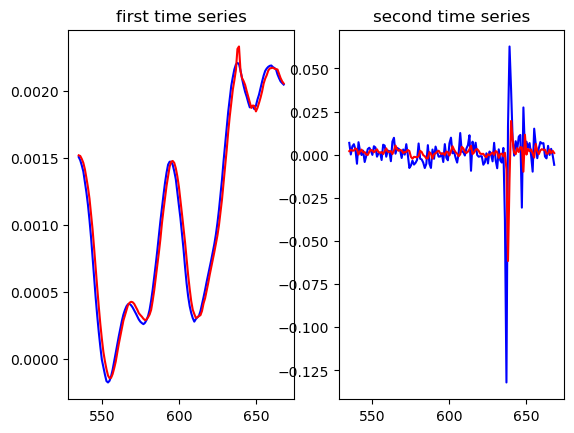

In [237]:
# y corresponding to forecasted values
y_true = merged_df.iloc[n-n_fcs:n+1,merged_df.columns.get_indexer(['dy_x','dy_y'])]
fcs = pd.DataFrame(fcs)
fcs.index = y_true.index
fcs.columns  = y_true.columns

# plot true and forecasted 
fig, axs = plt.subplots(1,2)
axs[0].plot(y_true['dy_x'],'b-')
axs[0].plot(fcs['dy_x'],'r-')
axs[0].set_title('first time series')
axs[1].plot(y_true['dy_y'],'b-')
axs[1].plot(fcs['dy_y'],'r-')
axs[1].set_title('second time series')



Checking the error scores and also the plots, I can conclude that despite the difficulties I had with granger causality, this time the results seem quite impressing. I think that this suggests that since the prediction is quite better now, then we second time series did in fact help to predict the first time series.

### Forecasting using Neural Network

In [245]:
!pip install keras

In [244]:
import tensorflow as tf

I use a simple Neural Network to train the data as below:

In [248]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K 
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks

data = train_data
data = np.array(data)
n = len(data)

window_size = 10
n_inputs = window_size
n_outputs = 1

# Create a sliding window from the data
X, y = [], []
for i in range(n - window_size):
    X.append(data[i:i+window_size])
    y.append(data[i+window_size])
X, y = np.array(X), np.array(y)

# Define the neural network
model = Sequential()
model.add(Dense(10, input_shape=(n_inputs,), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the neural network to the data
model.fit(X, y, epochs=50, verbose=0)

In [249]:
test_data = np.array(test_data)

# create the sliding window
test_X, test_y = [], []
for i in range(len(test_data) - window_size):
    test_X.append(test_data[i:i+window_size])
    test_y.append(test_data[i+window_size])
test_X, test_y = np.array(test_X), np.array(test_y)

# make the predictions
predictions = model.predict(test_X)


4/4 [==============================] - 0s 7ms/step


In [250]:
predictions

array([[1.1410426e-03],
       [1.0144140e-03],
       [8.6537987e-04],
       [7.2743860e-04],
       [6.1298895e-04],
       [5.0732156e-04],
       [4.1070714e-04],
       [3.1621638e-04],
       [2.4227554e-04],
       [1.7515023e-04],
       [1.1589227e-04],
       [7.0173410e-05],
       [4.4560060e-05],
       [3.7886552e-05],
       [5.2077929e-05],
       [7.1719638e-05],
       [1.1614000e-04],
       [1.8618302e-04],
       [2.4712528e-04],
       [3.0807563e-04],
       [3.6687683e-04],
       [4.2243645e-04],
       [4.6536000e-04],
       [5.0000934e-04],
       [5.2617007e-04],
       [5.4075848e-04],
       [5.4426480e-04],
       [5.3302769e-04],
       [5.1704107e-04],
       [4.9841800e-04],
       [4.7470338e-04],
       [4.4962071e-04],
       [4.2778981e-04],
       [4.1190116e-04],
       [3.9996073e-04],
       [3.9576925e-04],
       [4.0416809e-04],
       [4.2373943e-04],
       [4.5429071e-04],
       [5.0149777e-04],
       [5.6598766e-04],
       [6.478359

In [251]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_y, predictions))

In [252]:
rmse

0.00022583777096989621

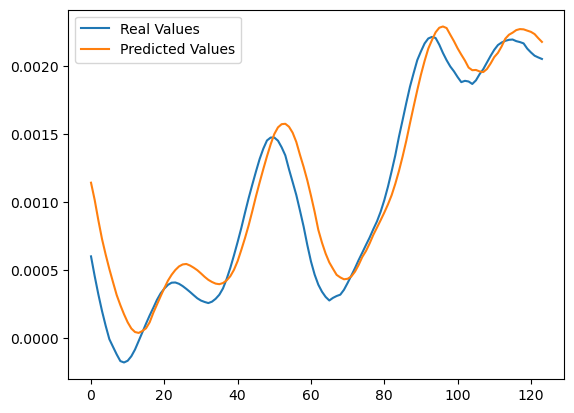

In [253]:
import matplotlib.pyplot as plt

# Plot the real values
plt.plot(test_y, label='Real Values')

# Plot the predicted values
plt.plot(predictions, label='Predicted Values')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In this part, everything went smoothly. After predicting, I calculated the rmse which is smaller as in the univariate model but bigger then the one in multivariate model. The plot also seems promising.

In my case, the rmsfe is smaller in the second case, VAR model and I think the reason is that we are using another model to predict our own. 

In multivariate time series models, the RMSE (root mean squared error) can appear to be very low due to the presence of multiple variables. This is because when multiple variables are used, the model is able to capture more information about the underlying patterns and relationships in the data. This can lead to more accurate predictions and, as a result, a lower RMSE.

Additionally, in time series models, the temporal dependencies and patterns between time steps are also considered, this can also lead to more accurate predictions and a lower RMSE.